In [2]:
ENV["Code"] = "../../Code"
for folder in readdir(ENV["Code"]); push!(LOAD_PATH, normpath(ENV["Code"], folder));end

using CSV
using NoLongerProblems_FileHandling
using NoLongerProblems
using NoLongerProblems_Pandas
using DataFrames
using HypothesisTests, MultipleTesting,Statistics
using Seaborn,PyPlot
import Pandas
using mm9
using RCall,Random
using PrettyPlotting
using DataFrames
using PyCall


function YiFangDeseq(name)
    yifandeseqfolder = ENV["Code"]*"/Databases/Cuartero2018/DE_result_norm2Rep_n_Spikes/"
    files = readdir(yifandeseqfolder)
     bool = [occursin(name, ii) for ii in files]
    file = files[bool]
     if length(file) == 1
        file = yifandeseqfolder*file[1]
        d = dropmissing(CSV.read(file, DataFrames.DataFrame, missingstring = "NA"))
        return rename!(d, :ensembl_id => :EnsemblID, :mgi_symbol => :GeneSymbol)
    else
        return files
    end
end
"""
function CSV.read(file, typeData;kwards...)
    CSV.read(file; kwards...)
end
"""


"function CSV.read(file, typeData;kwards...)\n    CSV.read(file; kwards...)\nend\n"

In [3]:
tb = CSV.read("all_genes.csv", DataFrames.DataFrame)

gene = []
RNAseqcomp = []
GROseqcomp = []
smFISHcomp = []
log2FC_RNAseq = []
log2FC_GROseq = []
FC_BS= []
FC_BF = []
N_Cells = []


function addtolists()
    
    push!(gene, gene1)

 gro = GroseDeseq(GROseqcomp1); 
g = gro[gro[!,:GeneSymbol] .== gene1, "log2FoldChange"]
    if length(g)>0
        push!(log2FC_GROseq, g[1])
    else
        push!(log2FC_GROseq, NaN)
    end
        

push!(GROseqcomp, GROseqcomp1);

rna = YiFangDeseq(RNAseqcomp1); r = rna[rna[!,:GeneSymbol] .== gene1, :log2FoldChange][1]; 
push!(RNAseqcomp, RNAseqcomp1); push!(log2FC_RNAseq, r);


smFISHsamples = split(smFISHcomp1);push!(smFISHcomp, smFISHcomp1)
smfish = tb[[in(ii, smFISHsamples) for ii in tb[!,:Sample]], :]
smfish = smfish[smfish[!,:Gene] .== gene1, :]
n1 = sum(smfish[smfish[!,:Sample] .== smFISHsamples[1], :N_Cells])
n2 = sum(smfish[smfish[!,:Sample] .== smFISHsamples[end], :N_Cells])
push!(N_Cells,n1 + n2)   
bf1 = Statistics.mean(smfish[smfish[!,:Sample] .== smFISHsamples[1], :BF])
bf2 = Statistics.mean(smfish[smfish[!,:Sample] .== smFISHsamples[end], :BF])
oddsratio = bf1/bf2
 push!(FC_BF, oddsratio)

bs1 = smfish[smfish[!,:Sample] .== smFISHsamples[1], :Mean_TSS]
bs2 = smfish[smfish[!,:Sample] .== smFISHsamples[end], :Mean_TSS]
fc = Statistics.mean(bs1[.!isnan.(bs1)]) ./ Statistics.mean(bs2[.!isnan.(bs2)])
push!(FC_BS, fc)
end


gene1 = "Prdm1"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_60 vs WT_0"
addtolists()

gene1 = "Egr2"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_60 vs WT_0"
addtolists()



gene1 = "Ifnb1"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_90 vs WT_0"
addtolists()

gene1 = "Il12b"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_90 vs WT_0"
addtolists()

gene1 = "Ifit1"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_180 vs WT_0"
addtolists()


gene1 = "Cxcl10"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_120 vs WT_0"
addtolists()


gene1 = "Peli1"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_120 vs WT_0"
addtolists()

gene1 = "Sertad2"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_120 vs WT_0"
addtolists()


gene1 = "Fh1"
RNAseqcomp1 = "WT8_Minus_WTUT"
GROseqcomp1 = "WT6__vs__WT0"
smFISHcomp1 = "WT_8 vs WT_0"
addtolists()

gene1 = "Hprt"
RNAseqcomp1 = "WT8_Minus_WTUT"
GROseqcomp1 = "WT6__vs__WT0"
smFISHcomp1 = "WT_8 vs WT_0"
addtolists()


tb_sum = DataFrames.DataFrame(
    FC_BS= FC_BS,
    FC_BF= FC_BF,
    log2FC_BS= log2.(FC_BS),
    log2FC_BF= log2.(FC_BF),
GeneSymbol = gene,
RNAseqcomp = RNAseqcomp,
GROseqcomp = GROseqcomp,
smFISHcomp = smFISHcomp,
log2FC_RNAseq = log2FC_RNAseq,
log2FC_GROseq = log2FC_GROseq,
    N_Cells = N_Cells

    
)


smFISHcomp

LoadError: ArgumentError: "all_genes.csv" is not a valid file or doesn't exist

In [3]:
function dysplay_correlation(tb, x, y; style = "RNAseqcomp", hue = "smFISHcomp")
    bool1 = .! isnan.(tb[!,x]); bool2 = .! isnan.(tb[!,y])
    nonantb = tb[bool1.*bool2, :]
    sort!(nonantb, "smFISHcomp")
    x1 = [ii for ii in nonantb[!,x]]
    y1 = [ii for ii in nonantb[!,y]]
    
    pdt = Pandas.DataFrame(nonantb)

    
    py"""
    import seaborn as sns
    sns.scatterplot(data = $pdt, x= $x, y = $y, hue = $hue, style = $style, palette = "husl", s = 50, linewidth = 0, hue_order = ["WT_60 vs WT_0","WT_90 vs WT_0","WT_120 vs WT_0","WT_180 vs WT_0","WT_8 vs WT_0"])
    
    sns.regplot(data = $pdt, x= $x, y = $y, scatter = 0, color = "darkgray")

    """
    pretty_axes2()
    legend_out_of_plot()
    R"cor.test($x1,$y1)"
    
    
end

dysplay_correlation (generic function with 1 method)

In [4]:
tb[tb[!,:Gene].=="Peli1", :]

,Sample,N_Cells,N_TSS,Mean_TSS,Median_TSS,BF,Rep,Gene,Genotype
,String,Int64,Int64,Float64,Float64,Float64,Int64,String,String
1,WT_90,659,828,6.9229,6.16666,0.628225,3,Peli1,WT
2,WT_90,2808,2536,4.88902,3.9649,0.451567,2,Peli1,WT
3,WT_90,823,623,3.92924,3.694,0.378493,1,Peli1,WT
4,Rad21KO_90,1040,535,4.40746,3.38501,0.257212,3,Peli1,Rad21KO
5,Rad21KO_90,1480,61,3.61349,3.00466,0.0206081,2,Peli1,Rad21KO
6,Rad21KO_90,76,5,2.67862,2.30169,0.0328947,1,Peli1,Rad21KO
7,WT_45,528,453,4.3401,3.08131,0.428977,3,Peli1,WT
8,WT_45,2133,387,2.99223,2.74905,0.0907173,2,Peli1,WT
9,WT_45,933,33,3.55884,3.43968,0.0176849,1,Peli1,WT


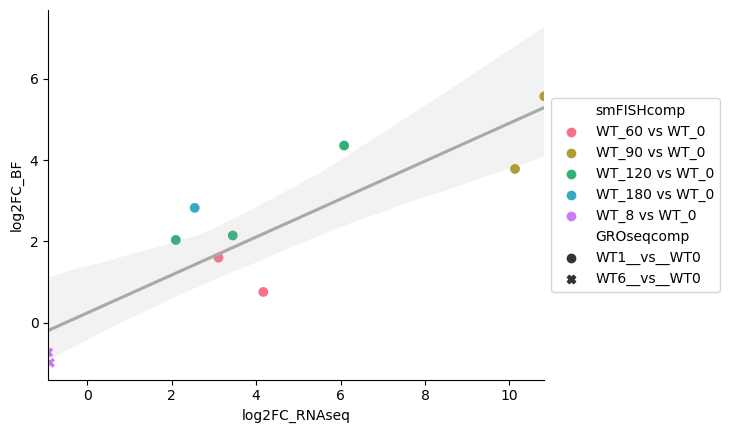

RObject{VecSxp}

	Pearson's product-moment correlation

data:  `#JL`$x1 and `#JL`$y1
t = 5.3208, df = 8, p-value = 0.0007104
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5705901 0.9721482
sample estimates:
      cor 
0.8829935 



In [12]:
dysplay_correlation(tb_sum, "log2FC_RNAseq", "log2FC_BF", style = "GROseqcomp")

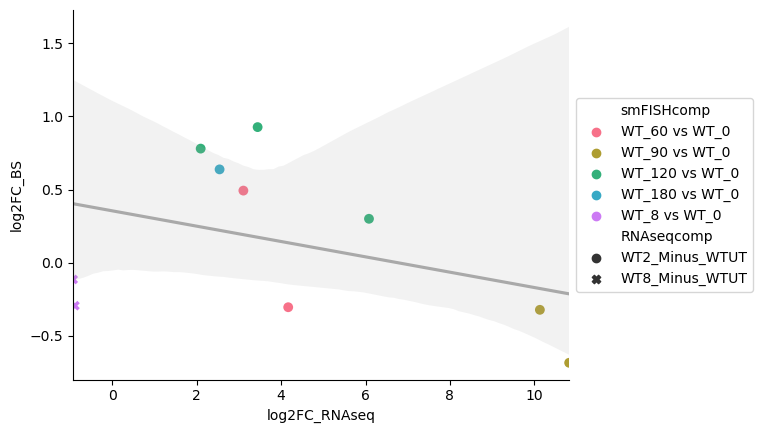

RObject{VecSxp}

	Pearson's product-moment correlation

data:  `#JL`$x1 and `#JL`$y1
t = -1.1526, df = 8, p-value = 0.2823
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8136718  0.3308604
sample estimates:
       cor 
-0.3773814 



In [11]:
dysplay_correlation(tb_sum, "log2FC_RNAseq", "log2FC_BS", style = "RNAseqcomp")

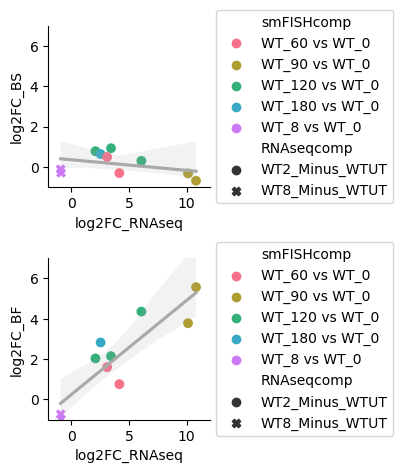

In [10]:
subplot(2,1,1)
dysplay_correlation(tb_sum, "log2FC_RNAseq", "log2FC_BS")

ylim(-1,7)
xlim(-2, 12)
   ax = gca()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable="box")

subplot(2,1,2)
dysplay_correlation(tb_sum, "log2FC_RNAseq", "log2FC_BF")

ylim(-1,7)
xlim(-2, 12)

    ax = gca()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable="box")


plt.tight_layout()

py"""
import matplotlib as mpl

new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)
import matplotlib.pyplot as plt
plt.savefig("smFISHvsRNAchanges_YiFang.svg")
"""

In [8]:
CSV.write("tables/Fig1_LPSresponse_smFISH_RNAseq_YiFang.csv", tb_sum)

"tables/Fig1_LPSresponse_smFISH_RNAseq_YiFang.csv"

In [9]:
tb_sum

,FC_BS,FC_BF,log2FC_BS,log2FC_BF,GeneSymbol,RNAseqcomp,GROseqcomp
,Any,Any,Float64,Float64,Any,Any,Any
1,0.809872,1.68963,-0.304234,0.756704,Prdm1,WT2_Minus_WTUT,WT1__vs__WT0
2,1.40738,3.03112,0.493013,1.59985,Egr2,WT2_Minus_WTUT,WT1__vs__WT0
3,0.799972,13.7634,-0.321979,3.78277,Ifnb1,WT2_Minus_WTUT,WT1__vs__WT0
4,0.622422,47.5386,-0.684035,5.57103,Il12b,WT2_Minus_WTUT,WT1__vs__WT0
5,1.55624,7.08614,0.638063,2.825,Ifit1,WT2_Minus_WTUT,WT1__vs__WT0
6,1.23143,20.5064,0.300334,4.358,Cxcl10,WT2_Minus_WTUT,WT1__vs__WT0
7,1.9014,4.42396,0.92706,2.14534,Peli1,WT2_Minus_WTUT,WT1__vs__WT0
8,1.71723,4.09831,0.78008,2.03503,Sertad2,WT2_Minus_WTUT,WT1__vs__WT0
9,0.923679,0.602276,-0.114536,-0.731502,Fh1,WT8_Minus_WTUT,WT6__vs__WT0


In [10]:
sum(tb_sum[!,:N_Cells][1:7])

98471